<a href="https://colab.research.google.com/github/CourtneyBrookes/Problem1/blob/main/ProblemSet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load MNIST and show montage

In [1]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [3]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [4]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [5]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 135581666.36it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 119345511.16it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 150084448.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21998301.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

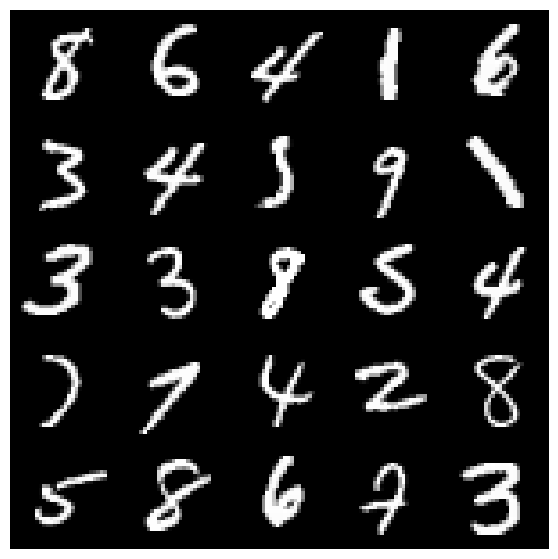

In [7]:
montage_plot(X[125:150,0,:,:])

#Run random y=mx model on MNIST

In [8]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [9]:
x = X[3,0,:,:]

In [10]:
x.shape

(28, 28)

In [11]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [12]:
x.shape

(784, 1)

In [13]:
x = x.reshape(28,28)

In [14]:
X_test.shape

(10000, 1, 28, 28)

In [15]:
X.shape[0]

60000

In [16]:
X_test.shape[0]

10000

In [17]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [18]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [19]:
X = X.T

In [20]:
X.shape

(784, 60000)

In [21]:
x = X[:,0:64]

In [22]:
Y[0:64]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [26]:
m = np.random.standard_normal((10,784))

In [27]:
y = m@X

In [28]:
y = np.argmax(y, axis=0)

In [29]:
y = np.matmul(m,x)

In [ ]:
y

#Train random walk model to at least 75%

In [31]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [32]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [33]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.09963333606719971
0.1459166705608368
0.15648333728313446
0.1682666689157486
0.17794999480247498
0.1785166710615158
0.18008333444595337
0.1907833367586136
0.2048500031232834
0.21476666629314423
0.21825000643730164
0.22903333604335785
0.22920000553131104
0.23149999976158142
0.23298333585262299
0.24424999952316284
0.2607666552066803
0.26543334126472473
0.2725333273410797
0.2859500050544739
0.2961333394050598
0.29783332347869873
0.3142666816711426
0.31536665558815
0.31761667132377625
0.31929999589920044
0.3321666717529297
0.33266666531562805
0.33846667408943176
0.3425333499908447
0.34568333625793457
0.3471333384513855
0.35011667013168335
0.3531000018119812
0.35795000195503235
0.3628333508968353
0.3693000078201294
0.3770666718482971
0.38190001249313354
0.38323333859443665
0.3838333487510681
0.39169999957084656
0.39233332872390747
0.3939666748046875
0.39594998955726624
0.39678335189819336
0.3981333374977112
0.4052833318710327
0.4090999960899353
0.4108999967575073
0.41233333945274353
0.4195